In [37]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon

# Define the extent of the grid
# can use .total_bounds on existing gpd
xmin, ymin, xmax, ymax = [22.,44.,40.,54.]

# umber of rows and columns
num_rows = 20
num_cols = 36

# Calculate the grid cell size
cell_size_x = (xmax - xmin) / num_cols
cell_size_y = (ymax - ymin) / num_rows

# Generate the grid points
x_coords = np.linspace(xmin, xmax, num_cols + 1)
y_coords = np.linspace(ymin, ymax, num_rows + 1)
xx, yy = np.meshgrid(x_coords, y_coords)

# Convert the grid points to polygons
polygons = [Polygon([(xx[i][j], yy[i][j]),
                     (xx[i+1][j], yy[i+1][j]),
                     (xx[i+1][j+1], yy[i+1][j+1]),
                     (xx[i][j+1], yy[i][j+1])]) 
            for i in range(num_rows) for j in range(num_cols)]


gdf = gpd.GeoDataFrame(geometry=polygons, crs="EPSG:4544")


#gdf.to_file('grid.shp')

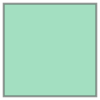

In [39]:
gdf.iloc[0]['geometry']